### **Formula One - 2023 Season Analysis**

`The new season has begun with the 10 teams and 20 drivers racing against each other to compete and win the world championship by participatig in a total of 23 races/tracks. This notebook consists of the analysis of the races, performance of drivers and teams in the races that are finished so far in the season.`

In [1]:
#import all python libraries required for the analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import io

In [2]:
#upload the input data needed for the analysis
#(The files are uploaded from the local system and are also provided in the Git Repo)

from google.colab import files
upload_files = files.upload()

Saving Formula1_2023 - Season_Calendar.csv to Formula1_2023 - Season_Calendar.csv
Saving Formula1_2023 - Race_Results.csv to Formula1_2023 - Race_Results.csv
Saving Formula1_2023 - Teams.csv to Formula1_2023 - Teams.csv
Saving Formula1_2023 - Drivers.csv to Formula1_2023 - Drivers.csv
Saving Formula1_2023 - Sprint_Results.csv to Formula1_2023 - Sprint_Results.csv


In [3]:
#read the data from each input file into pandas dataframes

race = pd.read_csv('Formula1_2023 - Race_Results.csv')
sprint = pd.read_csv('Formula1_2023 - Sprint_Results.csv')
teams = pd.read_csv('Formula1_2023 - Teams.csv', encoding='windows-1252')
drivers = pd.read_csv('Formula1_2023 - Drivers.csv')
calendar = pd.read_csv('Formula1_2023 - Season_Calendar.csv')

**Exploring Datasets and Understanding Data**

`For Reference:`

`Teams - [Alfa = Alfa Romeo],[Haas = Haas], [Asto = Asto Martin], [Will = Williams], [Alph = Alpha Tauri], [Mcla = Mc Laren], [Red = Redbull], [Ferr = Ferrari], [Mer = Mercedes], [Alpi = Alpine]`

`Drivers - [Bot = Valtteri Bottas, Zho = Zhou Guanyu], [Hul = Nico Hulkenberg, Mag = Kevin Magnussen], [Alo = Fernando Alonso, Str = Lance Stroll], [Sar = Logan Sargeant, Alb = Alexander Albon], [Tsu = Yuki Tsunoda, Dev = Nyck De Vries , Ric = Daniel Riccardo], [Pia = Oscar Piastri, Nor =  Lando Norris], [Ver = Max Verstappen, Per = Sergio Perez], [Lec = Charles Leclerc, Sai = Carlos Sainz], [Ham = Lewis Hamilton, Rus = George Russel], [Gas = Pierre Gasly, Oco = Esteban Ocon]`





In [4]:
# Assign colors to teams with its respective drivers to understand and interpret visualizations in the later part of the notebook
#(The car colors are used for easy identification of the teams)

def assign_color(val_type, values):
    color = []
    for val in values:
        if val_type == 'drivers':  abbr = val.split()[1].upper()[0:3]
        elif val_type == 'teams':  abbr = val[0:4].upper()
        if abbr in ['ALFA','BOT','ZHO']:   color.append('#900000')
        elif abbr in ['HAAS','HUL','MAG']:       color.append('#ffffff')
        elif abbr in ['ASTO','ALO','STR']:       color.append('#006f62')
        elif abbr in ['WILL','SAR','ALB']:       color.append('#0072ff')
        elif abbr in ['ALPH','TSU','DEV', 'RIC']:       color.append('#2b5962')
        elif abbr in ['MCLA','PIA','NOR']:       color.append('#ff8700')
        elif abbr in ['RED ','VER','PER']:       color.append('#0600f0')
        elif abbr in ['FERR','LEC','SAI']:       color.append('#cb0000')
        elif abbr in ['MERC','HAM','RUS']:       color.append('#00d2bd')
        elif abbr in ['ALPI','GAS','OCO']:       color.append('#0090ff')
    return color

`While each team will have two drivers competing in the races, we can see that the Alpha Tauri team has three drivers on the list. Due to Nyck De Vries' disappointing results in the races this season, Daniel Riccardo replaced De Vries' position.`

`Before diving into the race analysis, let us first check out the season calendar to see what's the season starting and starting end dates`

In [5]:
# check the race dates for 2023 Formula 1

calendar

,Round,Race Date,GP Name,Country,City,Circuit Name,First GP,Number of Laps,Circuit Length(km),Race Distance(km),Lap Record,Record Owner,Record Year,Turns,DRS Zones
0,1,5/3/2023,Gulf Air Bahrain GP,Bahrain,Sakhir,Bahrain International Circuit,2004,57,5.412,308.238,01:31.4,Pedro de la Rosa,2005.0,15.0,3.0
1,2,19/03/2023,STC Saudi Arabian GP,Saudi Arabia,Jeddah,Jeddah Corniche Circuit,2021,50,6.174,308.450,01:30.8,Lewis Hamilton,2021.0,27.0,3.0
2,3,2/4/2023,Rolex Australian GP,Australia,Melbourne,Albert Park Circuit,1996,58,5.278,306.124,01:20.3,Charles Leclerc,2022.0,14.0,2.0
3,4,30/4/2023,Azerbaijan GP,Azerbaijan,Baku,Baku City Circuit,2016,51,6.003,306.049,01:43.0,Charles Leclerc,2019.0,20.0,2.0
4,5,7/5/2023,Crypto.com Miami GP,United States,Miami,Miami International Autodrome,2022,57,5.412,308.326,01:31.4,Max Verstappen,2022.0,19.0,3.0
5,6,21/5/2023,Emilia Romagna Grand Prix,Italy,Imola,Autodromo Enzo e Dino Ferrari,1980,63,4.909,309.049,01:15.5,Lewis Hamilton,2020.0,19.0,1.0
6,7,28/05/2023,Grand Prix de Monaco,Monaco,Monte Carlo,Circuit de Monaco,1950,78,3.337,260.286,01:12.9,Lewis Hamilton,2021.0,19.0,1.0
7,8,4/6/2023,AWS Gran Premio De Espana,Spain,Catalunya,Circuit de Barcelona-Catalunya,1991,66,4.675,308.424,01:18.1,Max Verstappen,2021.0,16.0,2.0
8,9,18/06/2023,Pirelli Grand Prix Du Canada,Canada,Montreal,Circuit Gilles-Villeneuve,1978,70,4.361,305.270,01:13.1,Valtteri Bottas,2019.0,14.0,3.0
9,10,2/7/2023,Rolex Grosser Preis von Osterreich,Austria,Spielberg,Red Bull Ring,1970,71,4.318,306.452,01:05.6,Carlos Sainz,2020.0,10.0,3.0


`The season calendar reveals that there are a total of 23 races spread out throughout the course of the year at various locations in different countries. The season's opening race took place in Bahrain, and the final race will be hosted by Abu Dhabi in November. The table also provides details about the track or circuit, as well as the best lap record for that circuit. Few races are seen taking place more than once at different tracks within the same country.`

`While most of the 10 teams competing in the championship continue to be the same, occasionally new teams may enter the competition or the names of existing teams will change.`

In [6]:
# check which teams are participating in 2023 Formula 1

teams

,Team,Full Team Name,Base,Team Chief,Technical Chief,Chassis,Power Unit,First Team Entry,World Championships,Highest Race Finish,Pole Positions,Fastest Laps
0,Red Bull Racing,Oracle Red Bull Racing,"Milton Keynes, United Kingdom",Christian Horner,Pierre Wache,RB19,Honda RBPT,1997,5,1(x103),91,92
1,Ferrari,Scuderia Ferrari,"Maranello, Italy",Frederic Vasseur,Enrico Cardile / Enrico Gualtieri,SF23,Ferrari,1950,16,1(x243),244,259
2,Mercedes,Mercedes-AMG Petronas F1 Team,"Brackley, United Kingdom",Toto Wolff,James Allison,W14,Mercedes,1970,8,1(x116),129,93
3,Alpine,BWT Alpine F1 Team,"Enstone, United Kingdom",Otmar Szafneuer,Pat Fry,A523,Renault,1986,2,1(x21),20,15
4,McLaren,McLaren F1 Team,"Woking, United Kingdom",Andrea Stella,Peter Prodromou,MCL60,Mercedes,1966,8,1(x183),156,162
5,Alfa Romeo,Alfa Romeo F1 Team Stake,"Hinwil, Switzerland",Alessandro Alunni Bravi,Jan Monchaux,C43,Ferrari,1993,0,1(x1),1,7
6,Aston Martin,Aston Martin Aramco Cognizant F1 Team,"Silverstone, United Kingdom",Mike Krack,Dan Fallows,AMR23,Mercedes,2018,0,1(x1),1,0
7,Haas,MoneyGram Haas F1 Team,"Kannapolis, United States",Guenther Steiner,Simone Resta,VF23,Ferrari,2016,0,4(x1),1,2
8,AlphaTauri,Scuderia AlphaTauri,"Faenza, Italy",Franz Tost,Jody Egginton,AT04,Honda RBPT,1985,0,1(x2),1,2
9,Williams,Williams Racing,"Grove, United Kingdom",James Vowles,TBC,FW45,Mercedes,1978,9,1(x114),128,133


`The team's table provides all the information about an individual team, including its total number of podium finishes and world championships earned over the years. As can be seen, Ferrari is the most experienced team in Formula One, having competed since 1950, while Aston Martin is a more recent addition.`

`Based on their success in the previous season, the list of drivers who will be competing changes every season. While occasionally new drivers are added to the teams, often drivers simply change teams over different seasons.`

In [7]:
# check the list of drivers picked-up in the 2023 race season

drivers

,Driver,Abbreviation,No,Team,Country,Podiums,Points,Grands Prix Entered,World Championships,Highest Race Finish,Highest Grid Position,Date of Birth,Place of Birth
0,Max Verstappen,VER,1,Red Bull Racing,Netherlands,88,2292.5,174,2,1(x44),1,30/09/1997,"Hasselt,Belgium"
1,Sergio Perez,PER,11,Red Bull Racing,Mexico,32,1372.0,247,0,1(x6),1,26/01/1990,"Guadalajara, Mexico"
2,Fernando Alonso,ALO,14,Aston Martin,Spain,104,2200.0,369,2,1(x32),1,29/07/1981,"Oviedo, Spain"
3,Lewis Hamilton,HAM,44,Mercedes,United Kingdom,195,4538.5,321,7,1(x103),1,7/1/1985,"Stevenage, England"
4,George Russell,RUS,63,Mercedes,United Kingdom,10,384.0,93,0,1(x1),1,15/02/1998,"King's Lynn, England"
5,Carlos Sainz,SAI,55,Ferrari,Spain,15,869.5,174,0,1(x1),1,1/9/1994,"Madrid, Spain"
6,Charles Leclerc,LEC,16,Ferrari,Monaco,26,948.0,114,0,1(x5),1,16/10/1997,"Monte Carlo, Monaco"
7,Lando Norris,NOR,4,McLaren,United Kingdom,8,488.0,93,0,2(x3),1,13/11/1999,"Bristol, England"
8,Lance Stroll,STR,18,Aston Martin,Canada,3,239.0,133,0,3(x3),1,29/10/1998,"Montreal, Canada"
9,Esteban Ocon,OCO,31,Alpine,France,3,395.0,122,0,1(x1),3,17/09/1996,"Evreux, Normandy"


`The drivers table provides specific information about each driver, such as the team they race for, how many points they have earned, and how many championships and podiums they have won throughout their Formula One careers.`

In [8]:
calendar.sort_values('First GP')[['Country', 'City', 'Circuit Name', 'First GP']].head()

,Country,City,Circuit Name,First GP
6,Monaco,Monte Carlo,Circuit de Monaco,1950
10,Great Britain,Silverstone,Silverstone Circuit,1950
14,Italy,Monza,Autodromo Nazionale Monza,1950
12,Belgium,Spa-Francorchamps,Circuit de Spa-Francorchamps,1950
13,Netherlands,Zandvoort,Circuit Zandvoort,1952


`The above table shows us that there are a total of 5 historic Grand Prix race tracks in this season. The Silverstone and Monza tracks will always remain the favourites of Formula-1 race fans.`

`The top 3 finishes in any given race are considered to be the podium positions. While 11 races are held in this 2023 season so far, I'm going to check the podium finishes at some of the fan's favorite tracks.`

In [9]:
# Bahrain Grand Prix

race[race['Track'] == 'Bahrain'].set_index('Position').drop('Track', axis=1).head(3)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,33:56.7,25,No,01:36.2
2,11,Sergio Perez,Red Bull Racing Honda RBPT,2,57,11.987,18,No,01:36.3
3,14,Fernando Alonso,Aston Martin Aramco Mercedes,5,57,38.637,15,No,01:36.2


In [10]:
# Australian Grand Prix

race[race['Track'] == 'Australia'].set_index('Position').drop('Track', axis=1).head(3)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,58,32:28.4,25,No,01:20.3
2,44,Lewis Hamilton,Mercedes,3,58,0.179,18,No,01:20.6
3,14,Fernando Alonso,Aston Martin Aramco Mercedes,4,58,0.769,15,No,01:20.5


In [11]:
# Monaco Grand Prix

race[race['Track'] == 'Monaco'].set_index('Position').drop('Track', axis=1).head(3)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,78,48:52.0,25,No,01:16.6
2,14,Fernando Alonso,Aston Martin Aramco Mercedes,2,78,27.921,18,No,01:16.7
3,31,Esteban Ocon,Alpine Renault,3,78,36.99,15,No,01:16.5


In [12]:
# Spain Grand Prix

race[race['Track'] == 'Spain'].set_index('Position').drop('Track', axis=1).head(3)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,66,27:57.9,26,Yes,01:16.3
2,44,Lewis Hamilton,Mercedes,4,66,24.09,18,No,01:16.7
3,63,George Russell,Mercedes,12,66,32.389,15,No,01:17.9


In [13]:
# Austria Grand Prix

race[race['Track'] == 'Austria'].set_index('Position').drop('Track', axis=1).head(3)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,71,25:33.6,26,Yes,01:07.0
2,16,Charles Leclerc,Ferrari,2,71,5.155,18,No,01:08.8
3,11,Sergio Perez,Red Bull Racing Honda RBPT,15,71,17.188,15,No,01:08.1


`According to the podium results of a few racesMax Verstappen of Redbull has taken home the most victories this season, followed by Sergio Perez of the same team. It will be intriguing to see if other teams can match Redbull's speed with only half the season remaining.`

`Verstappen may appear to be at the top of the points list, but let's look at the points of the other drivers to have a better picture of their performance and competition level in this season.`

In [14]:
# checking driver rankings so far in the 2023 season

driverPts = race.groupby(['Driver', 'Team'])['Points'].sum()
sprintQualifierDriverPts = sprint.groupby(['Driver', 'Team'])['Points'].sum()
driverPts = (driverPts+sprintQualifierDriverPts).sort_values(ascending=False).reset_index()
driverPts.index = [i for i in range(1,21)]
driverPts

,Driver,Team,Points
1,Max Verstappen,Red Bull Racing Honda RBPT,255
2,Sergio Perez,Red Bull Racing Honda RBPT,156
3,Fernando Alonso,Aston Martin Aramco Mercedes,137
4,Lewis Hamilton,Mercedes,121
5,Carlos Sainz,Ferrari,83
6,George Russell,Mercedes,82
7,Charles Leclerc,Ferrari,74
8,Lance Stroll,Aston Martin Aramco Mercedes,44
9,Lando Norris,McLaren Mercedes,42
10,Esteban Ocon,Alpine Renault,31


`Although the drivers who win in the 1st 3 positions are the race winners and score more points, let us see what is the progression of points over the season for the top 5 drivers.`

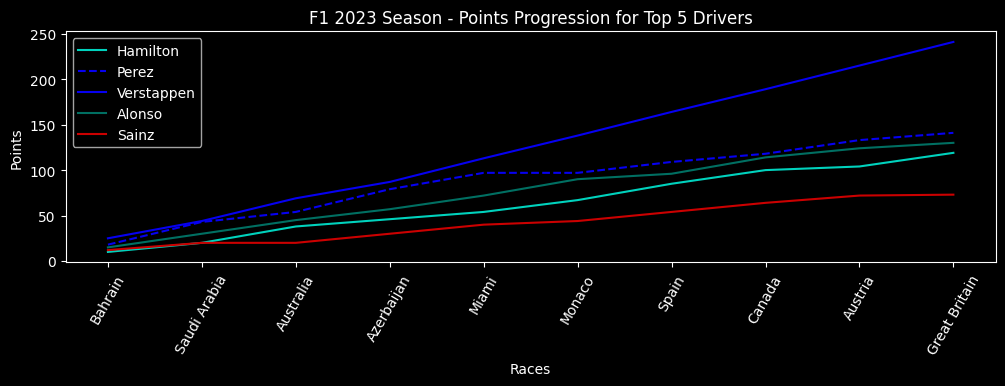

In [32]:
# plot the points progression of top 5 drivers of the season

def get_season_progression(arr):
    prg = []
    ls='-'
    p = 0
    for i in range(len(arr)):
        p += arr[i]
        prg.append(p)
    return np.array(prg)

races = race['Track'].unique()
hamilton = race[race['Driver'] == 'Lewis Hamilton']['Points'].values
perez = race[race['Driver'] == 'Sergio Perez']['Points'].values
alonso = race[race['Driver'] == 'Fernando Alonso']['Points'].values
sainz = race[race['Driver'] == 'Carlos Sainz']['Points'].values
verstappen = race[race['Driver'] == 'Max Verstappen']['Points'].values

plt.figure(figsize=(12,3))
plt.style.use("dark_background")
plt.plot(get_season_progression(hamilton), color='#00d2bd', label='Hamilton')
plt.plot(get_season_progression(perez), color='#0600f0', label='Perez', ls='--')
plt.plot(get_season_progression(verstappen), color='#0600f0', label='Verstappen')
plt.plot(get_season_progression(alonso), color='#006f62', label='Alonso')
plt.plot(get_season_progression(sainz), color='#cb0000', label='Sainz')
plt.title('F1 2023 Season - Points Progression for Top 5 Drivers')
plt.xlabel('Races')
plt.ylabel('Points')
plt.xticks(np.arange(10), races, rotation=60)
plt.legend()
plt.show()

`From the plot, it is clear that Perez and Alonso are fiercely competing while Max Vestarppen is in the lead in the points standings. After watching previous seasons, it is a little unexpected that Mercedes/Hamilton is still having trouble finishing in the top three.
`

`Everything is still possible in the remaining half of the season's races. To determine whether other drivers have a chance to finish in the top five given that their performance will likely improve, let's track their progress throughout the season.`

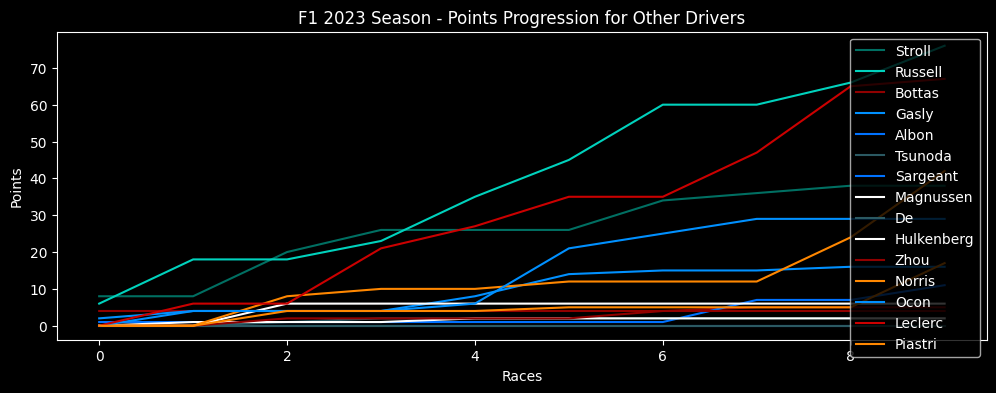

In [16]:
# Assuming 'race' is your DataFrame containing race data, and 'races' is a list of race names
drivers = race['Driver'].unique()[5:]
teams = race['Team'].unique()

drivers_color = assign_color("teams", teams)  # Get the team colors for each team

plt.figure(figsize=(12, 4))

for i, driver in enumerate(drivers):
    team = race.loc[race['Driver'] == driver, 'Team'].iloc[0]
    driver_points = race[race['Driver'] == driver]['Points'].values
    plt.plot(get_season_progression(driver_points), color=drivers_color[teams.tolist().index(team)], label=driver.split()[1])

plt.title('F1 2023 Season - Points Progression for Other Drivers')
plt.xlabel('Races')
plt.ylabel('Points')
plt.legend()
plt.show()


`The drivers are awarded points based on where they finished in the race. Let's check out the finishes each driver attained in each race.`

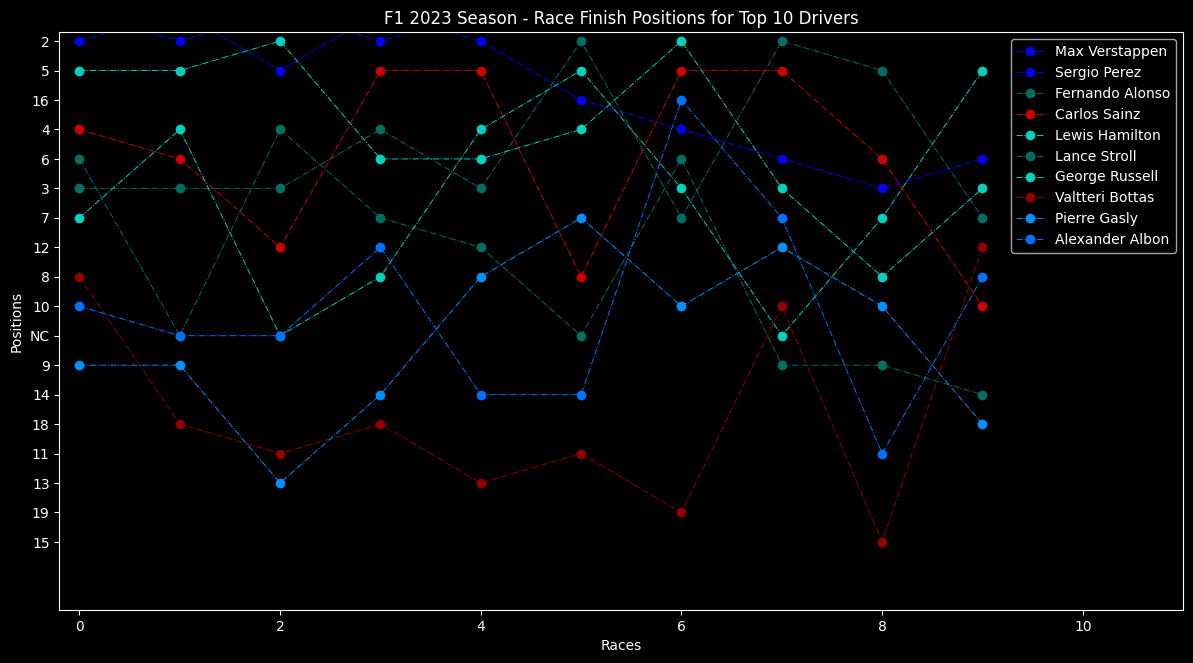

In [17]:
race_results = race[['Track', 'Position', 'Driver']]
race_results = race_results.astype({'Position':'int32'}, errors='ignore')
drivers = race['Driver'].unique()[:10]
colors = assign_color("drivers", race['Driver'])

plt.figure(figsize=(14.5,7.5))
plt.axis((-0.2,11,20.3,0.7))
for i in range(len(drivers)):
    positions = race_results[race_results['Driver'] == drivers[i]]['Position'].values
    plt.plot(positions, color=colors[i], label=drivers[i], marker='o', linewidth=0.7, linestyle='-.')
plt.title('F1 2023 Season - Race Finish Positions for Top 10 Drivers')
plt.xlabel('Races')
plt.ylabel('Positions')
plt.legend(loc='upper right')
plt.show()

`The winning positions of each driver during the season demonstrate how unpredictable Formula 1 races can be. Vestarpeen was able to finish on the podium in every race, although the other drivers' performances varied widely.`

`The teams competing in the race are ranked according to the points awarded based on the performance of the drivers in the constructor standings. Let's examine the season-to-date results of the various teams.`

In [18]:
# constructor standings

teamPts = race.groupby('Team')['Points'].sum()
sprintQualifierTeamPts = sprint.groupby('Team')['Points'].sum()
teamPts = (teamPts+sprintQualifierTeamPts).sort_values(ascending=False).reset_index()
teamPts.index = [i for i in range(1,11)]
teamPts

,Team,Points
1,Red Bull Racing Honda RBPT,411
2,Mercedes,203
3,Aston Martin Aramco Mercedes,181
4,Ferrari,157
5,McLaren Mercedes,59
6,Alpine Renault,47
7,Haas Ferrari,11
8,Williams Mercedes,11
9,Alfa Romeo Ferrari,9
10,AlphaTauri Honda RBPT,2


`Wooahhh! The Redbull team has the most points this season for a team in the constructor rankings, followed by Mercedes, Aston Martin, and Ferrari. While Redbull leads Mercedes by 208 points with only half the season remaining, it will be interesting to see which 2 teams finish 2nd and 3rd in the constructor standings.`

` With a shorter race and no required pit stops for drivers, the Sprint session is similar to a qualifying format. Only a few races are introduced with sprint periods, and only the podium places receive points. Let's now take a look at the podium finishers from each sprint session race to yet.`

In [19]:
# checking the podium winners of sprint session-1

sprint[sprint['Track'] == 'Azerbaijan'].set_index('Position').head(3)

,Track,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
Position,,,,,,,,
1,Azerbaijan,11,Sergio Perez,Red Bull Racing Honda RBPT,2,17,33:17.667,8
2,Azerbaijan,16,Charles Leclerc,Ferrari,1,17,+4.463,7
3,Azerbaijan,1,Max Verstappen,Red Bull Racing Honda RBPT,3,17,+5.065,6


In [20]:
# checking the podium winners of sprint session-2

sprint[sprint['Track'] == 'Austria'].set_index('Position').head(3)

,Track,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
Position,,,,,,,,
1,Austria,1,Max Verstappen,Red Bull Racing Honda RBPT,1,24,30:26.730,8
2,Austria,11,Sergio Perez,Red Bull Racing Honda RBPT,2,24,+21.048,7
3,Austria,55,Carlos Sainz,Ferrari,5,24,+23.088,6


`The Redbull drivers were successful in taking the top spots on the podium in both sprint races, with the Ferrari drivers taking the other spot.`

`While we've already seen the podium finishers, let's look at the Grand Prix winners from the previous races.`

In [21]:
# individual race winner so far in the season

raceWinners = race[race['Position'] == '1'].set_index('Track').drop('Position', axis=1)
raceWinners

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Track,,,,,,,,,
Bahrain,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,33:56.7,25,No,01:36.2
Saudi Arabia,11,Sergio Perez,Red Bull Racing Honda RBPT,1,50,21:14.9,25,No,01:32.2
Australia,1,Max Verstappen,Red Bull Racing Honda RBPT,1,58,32:28.4,25,No,01:20.3
Azerbaijan,11,Sergio Perez,Red Bull Racing Honda RBPT,3,51,32:42.4,25,No,01:44.6
Miami,1,Max Verstappen,Red Bull Racing Honda RBPT,9,57,27:38.2,26,Yes,01:29.7
Monaco,1,Max Verstappen,Red Bull Racing Honda RBPT,1,78,48:52.0,25,No,01:16.6
Spain,1,Max Verstappen,Red Bull Racing Honda RBPT,1,66,27:57.9,26,Yes,01:16.3
Canada,1,Max Verstappen,Red Bull Racing Honda RBPT,1,70,33:58.3,25,No,01:15.6
Austria,1,Max Verstappen,Red Bull Racing Honda RBPT,1,71,25:33.6,26,Yes,01:07.0


In [22]:
race_winners = race[race['Position'] == '1']
race_winners['Driver'].value_counts()

Max Verstappen    8
Sergio Perez      2
Name: Driver, dtype: int64

`Max Verstappen has won eight of the first ten grand prix seasons, making him the current world champion. The other two Grand Prix races were won by Sergio Perex, the other Redbull driver.`

In [23]:
race_winners['Team'].value_counts()

Red Bull Racing Honda RBPT    10
Name: Team, dtype: int64

`It is clear that the Redbull team is having a successful season and is maintaining their position.`

`Race pole positions are seen to be extremely important to winning the race. In order to determine whether Max Verstappen's wins throughout the season were influenced in any way, let's look at which driver won the pole positions in each race.`

In [24]:
# pole position winners

polePos = race[race['Starting Grid'] == 1].set_index('Track').drop('Starting Grid', axis=1)
polePos

,Position,No,Driver,Team,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Track,,,,,,,,,
Bahrain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,57,33:56.7,25,No,01:36.2
Saudi Arabia,1,11,Sergio Perez,Red Bull Racing Honda RBPT,50,21:14.9,25,No,01:32.2
Australia,1,1,Max Verstappen,Red Bull Racing Honda RBPT,58,32:28.4,25,No,01:20.3
Azerbaijan,3,16,Charles Leclerc,Ferrari,51,21.217,15,No,01:44.6
Miami,2,11,Sergio Perez,Red Bull Racing Honda RBPT,57,5.384,18,No,01:30.6
Monaco,1,1,Max Verstappen,Red Bull Racing Honda RBPT,78,48:52.0,25,No,01:16.6
Spain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,66,27:57.9,26,Yes,01:16.3
Canada,1,1,Max Verstappen,Red Bull Racing Honda RBPT,70,33:58.3,25,No,01:15.6
Austria,1,1,Max Verstappen,Red Bull Racing Honda RBPT,71,25:33.6,26,Yes,01:07.0


`According to the results, it appears that the pole position did in fact contribute to the Redbull drivers' wins.`

`With the help of a bar graph that shows us the total number of times each driver started in pole position, let's observe the same results.`

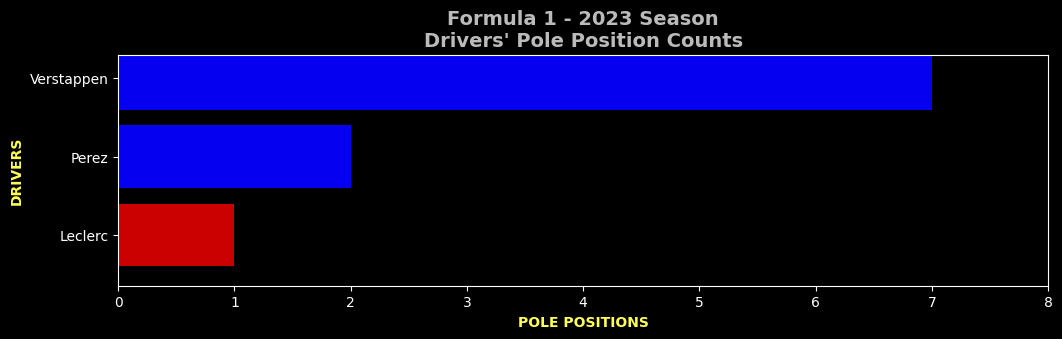

In [25]:
# count for the number of times winning pole positions

polePosCnt = polePos['Driver'].value_counts()
c = assign_color("drivers", polePosCnt.index)

plt.figure(figsize=(12,3))
plt.axis([0,8,2.65,-0.3])
plt.barh([driver.split()[1] for driver in polePosCnt.index], polePosCnt.values, color=c)
plt.title("Formula 1 - 2023 Season\nDrivers' Pole Position Counts", fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xlabel('POLE POSITIONS', fontsize=10, color='#ffff55', fontweight='bold')
plt.ylabel('DRIVERS', fontsize=10, color='#ffff55', fontweight='bold')
plt.show()

`The number of podium finishes a driver has earned so far this season is represented visually in the following code.`

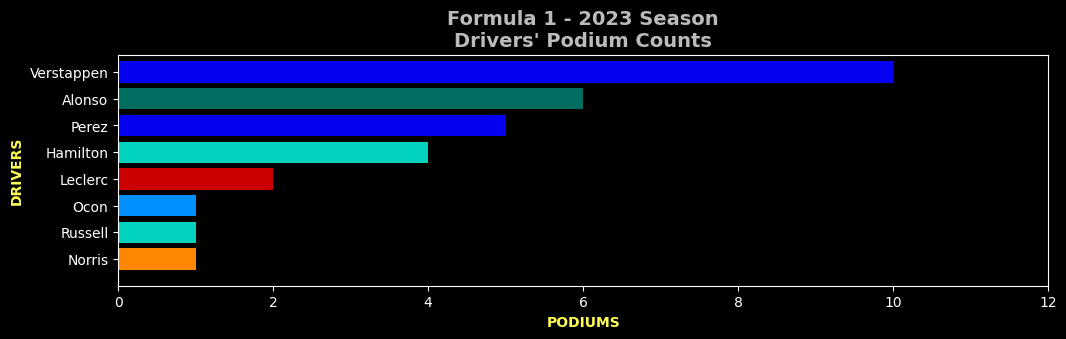

In [26]:
# podium finishes count

podiumFinish = race[race['Position'].isin(['1','2','3'])].set_index('Track').drop('Position', axis=1)
podiumCnt = podiumFinish['Driver'].value_counts()
c = assign_color("drivers", podiumCnt.index)

plt.figure(figsize=(12,3))
plt.axis([0,12,8,-0.65])
plt.barh([driver.split()[1] for driver in podiumCnt.index], podiumCnt.values, color=c)
plt.title("Formula 1 - 2023 Season\nDrivers' Podium Counts", fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xlabel('PODIUMS', fontsize=10, color='#ffff55', fontweight='bold')
plt.ylabel('DRIVERS', fontsize=10, color='#ffff55', fontweight='bold')
plt.show()

`The results support the understanding we had based on the earlier findings. Eight different drivers have taken home podium finishes. Redbull and Mercedes have the most podium finishes as a team.`

`Let us now see the number of times, driver are in the top-10 positions.`

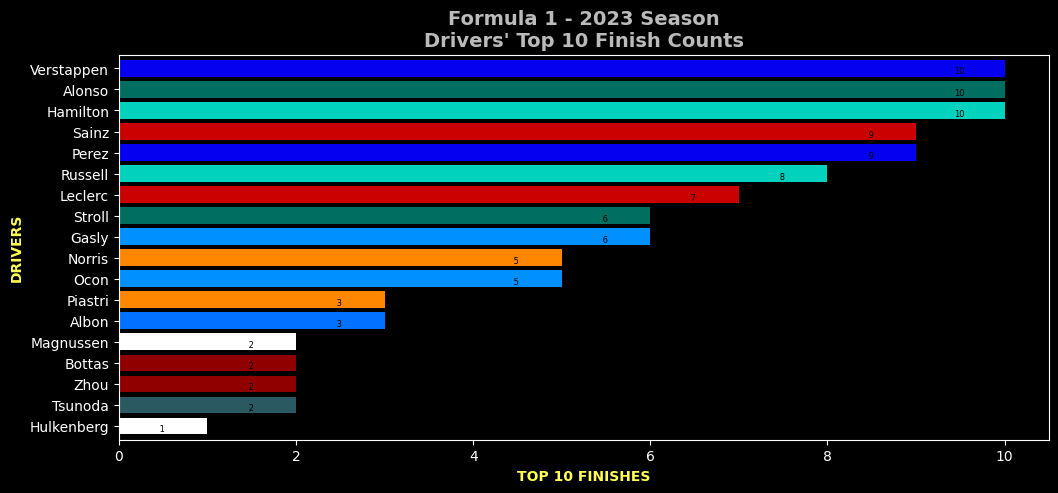

In [27]:
# count of no.of drivers finished the race in top-10

topTen = [str(i) for i in range(1,11)]
topTenFinish = race[race['Position'].isin(topTen)]
topTenFinishCnt = topTenFinish['Driver'].value_counts()
c = assign_color("drivers", topTenFinishCnt.index)

plt.figure(figsize=(12,5))
plt.axis([0,10.5,17.65,-0.65])
plt.barh([driver.split()[1] for driver in topTenFinishCnt.index], topTenFinishCnt.values, color=c)
for i in range(len(topTenFinishCnt)):
    plt.text(topTenFinishCnt.values[i]-0.57, i+0.26, "{:2}".format(topTenFinishCnt.values[i]), fontsize=6, color='k')
plt.title("Formula 1 - 2023 Season\nDrivers' Top 10 Finish Counts", fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xlabel('TOP 10 FINISHES', fontsize=10, color='#ffff55', fontweight='bold')
plt.ylabel('DRIVERS', fontsize=10, color='#ffff55', fontweight='bold')
plt.show()

`Considering the earlier findings, it is unlikely that Sainz, Perez, and Russell did not finish in the top 10 in a few races despite having high scores.`

`Let's examine these results in more detail. The drivers might have crashed and not finished the race, or they might have scored a place without qualifying in the top ten. Let's create a graph that displays which drivers failed to finish races this season.`

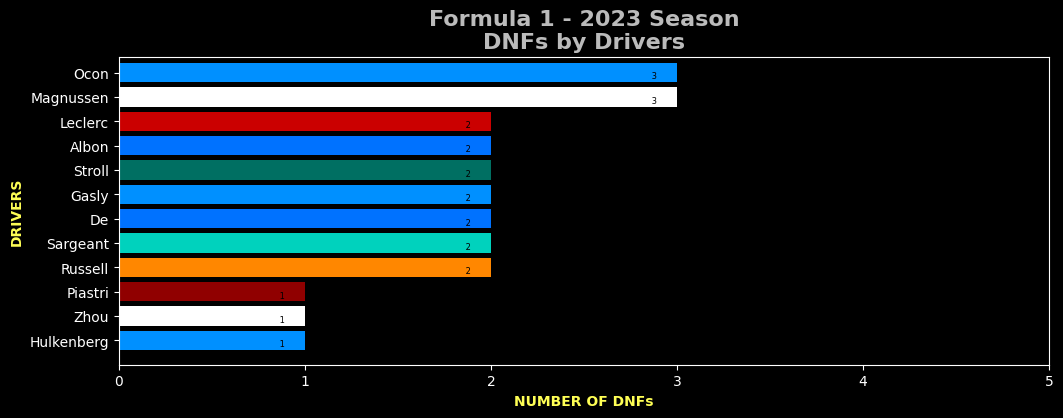

In [28]:
# DNF-did not finish counts

dnfResultsDriver = race[race['Time/Retired'] == 'DNF']['Driver'].value_counts()
c = assign_color("drivers", dnfResultsDriver.index)

plt.figure(figsize=(12,4))
plt.axis([0,5,12,-0.65])
plt.barh([driver.split()[1] for driver in dnfResultsDriver.index], dnfResultsDriver.values, color=c)
for i in range(len(dnfResultsDriver)):
    plt.text(dnfResultsDriver.values[i]-0.15, i+0.25, "{:2}".format(dnfResultsDriver.values[i]), fontsize=6, color='k')
plt.title("Formula 1 - 2023 Season\nDNFs by Drivers", fontsize=16, fontweight='bold', color='#bbbbbb')
plt.xlabel('NUMBER OF DNFs', fontsize=10, color='#ffff55', fontweight='bold')
plt.ylabel('DRIVERS', fontsize=10, color='#ffff55', fontweight='bold')
plt.show()

`Perez and Sainz have no DNFs, whereas Russell has two, as seen in the graph. This shows that, regardless of the circumstances, Perez and Sainz have races where they failed to qualify in the top-10 positions.`

`Every track in the Formula 1 races has different number of laps.`

In [29]:
# total laps by drivers

Laps = race['Laps'].sum()
Laps

11554

`So far in the season, 11554 laps have been finished by all the drivers together.`

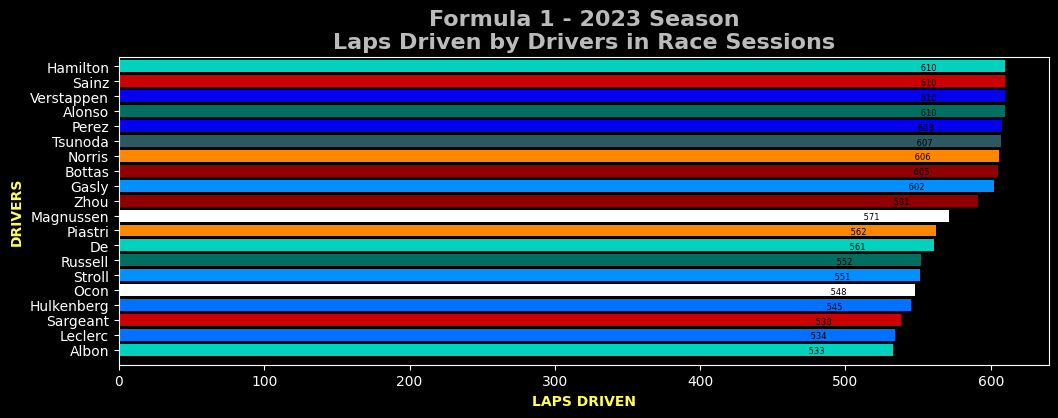

In [30]:
# total laps so far

driversLaps = race.groupby('Driver')['Laps'].sum().sort_values(ascending=False)
c = assign_color('drivers', driversLaps.index)
plt.figure(figsize=(12,4))
plt.axis([0, max(driversLaps.values)+30, 20, -0.65])
plt.barh([driver.split()[1] for driver in driversLaps.index], driversLaps.values, color=c)
plt.title("Formula 1 - 2023 Season\nLaps Driven by Drivers in Race Sessions", fontsize=16, fontweight='bold', color='#bbbbbb')
for i in range(len(driversLaps)):
    plt.text(driversLaps.values[i]-60, i+0.25, "{:4}".format(driversLaps.values[i]), fontsize=6, color='k')
plt.xlabel('LAPS DRIVEN', fontsize=10, color='#ffff55', fontweight='bold')
plt.ylabel('DRIVERS', fontsize=10, color='#ffff55', fontweight='bold')
plt.show()

`The graph gives the information on total number of laps completed by individual drivers in the season.`

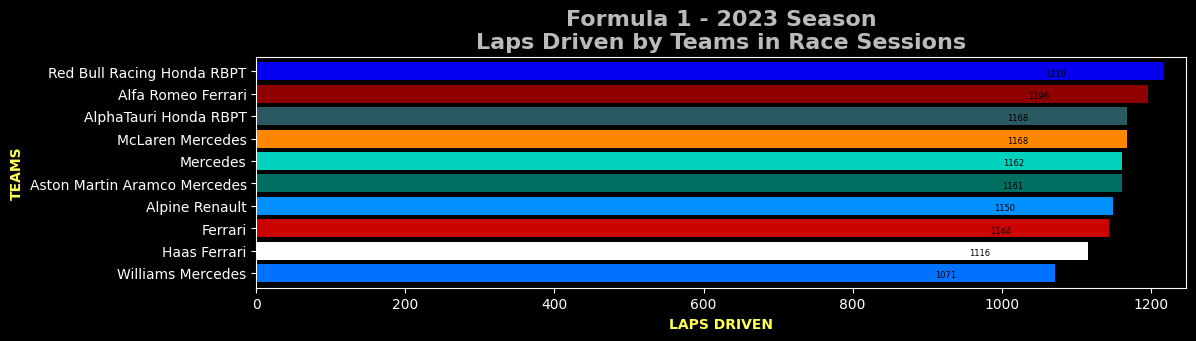

In [31]:
# total laps by teams

teamsLaps = race.groupby('Team')['Laps'].sum().sort_values(ascending=False)
c = assign_color('teams', teamsLaps.index)
plt.figure(figsize=(12,3))
plt.axis([0, max(teamsLaps.values)+30, 9.65, -0.65])
plt.barh(teamsLaps.index, teamsLaps.values, color=c)
plt.title("Formula 1 - 2023 Season\nLaps Driven by Teams in Race Sessions", fontsize=16, fontweight='bold', color='#bbbbbb')
for i in range(len(teamsLaps)):
    plt.text(teamsLaps.values[i]-160, i+0.2, "{:4}".format(teamsLaps.values[i]), fontsize=6, color='k')
plt.xlabel('LAPS DRIVEN', fontsize=10, color='#ffff55', fontweight='bold')
plt.ylabel('TEAMS', fontsize=10, color='#ffff55', fontweight='bold')
plt.show()

`The graph gives the information on total number of laps completed by teams.`

`From all the analysis that was done for the race results so far, I believe that Redbull team will be the top in constructor standings with Max Verstappen winning the world championship for the team.`

I'll come back to update this project to see if my insights are valid and update the results with entire 2023 season data.